In [1]:
#import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
#Load the dataset
dataset = pd.read_csv('C:\\Users\\ritam\\Downloads\\Dataset.csv')


In [3]:
#Look at the dataset, its columns, range of those columns,
print(dataset.head())
print(dataset.columns)
print(dataset.size)

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [4]:
#Drop those columns wbich bave data in non-int or non-float form and whose data wouldn't be useful even if we convert it to a number
drop_columns = []
for column in dataset.columns:
    if dataset[column].dtype not in ['int64', 'float64']:
        drop_columns.append(column)
dataset = dataset.drop(drop_columns, axis=1)

In [5]:
#Find missing values in data
missing_values = dataset.isnull().sum()
print(missing_values)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
#If a column has more than 70% missing vaues then drop it
#Otherwise fill it with mean (experiment with both mean and median)
drop_columns = missing_values[missing_values / len(dataset) > 0.7].index
dataset = dataset.drop(drop_columns, axis=1)
fill_mean = dataset.mean()
dataset = dataset.fillna(fill_mean)
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#Plot distribution plots of different columns

In [8]:
#Find skewness in data of different columns
skewness = dataset.skew()
print(skewness)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


In [9]:
#Remove skewness using square root transform(try out different methods like log transform)
dataset_sqrt = np.sqrt(dataset)

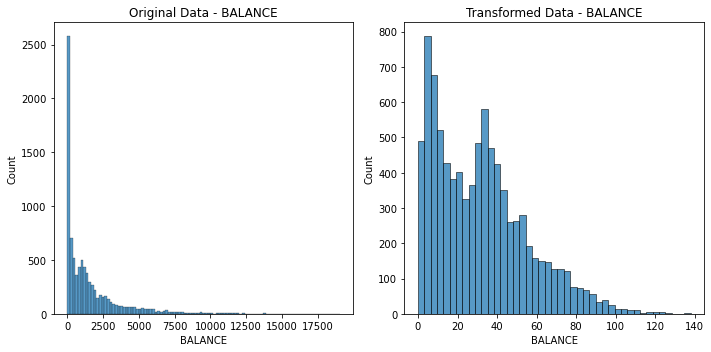

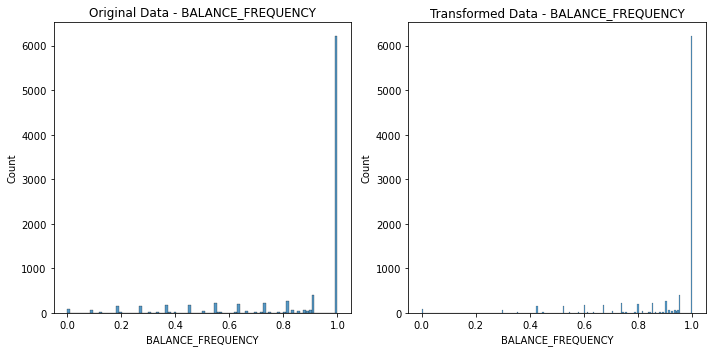

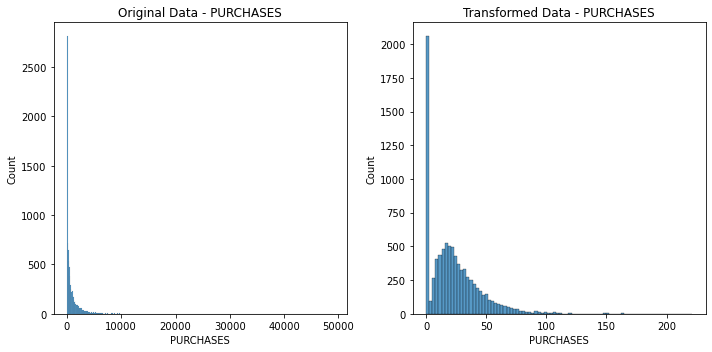

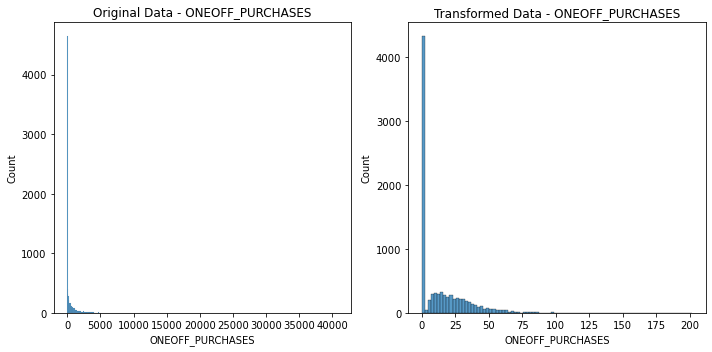

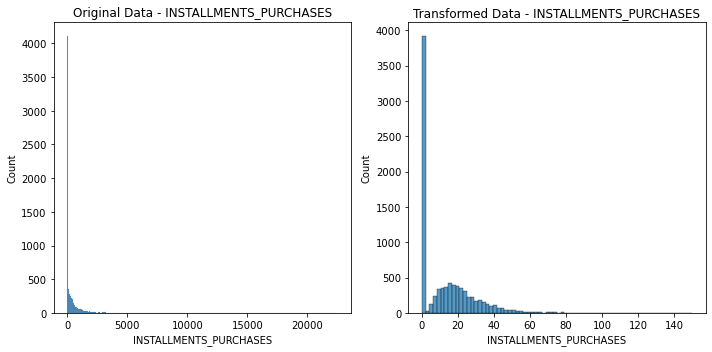

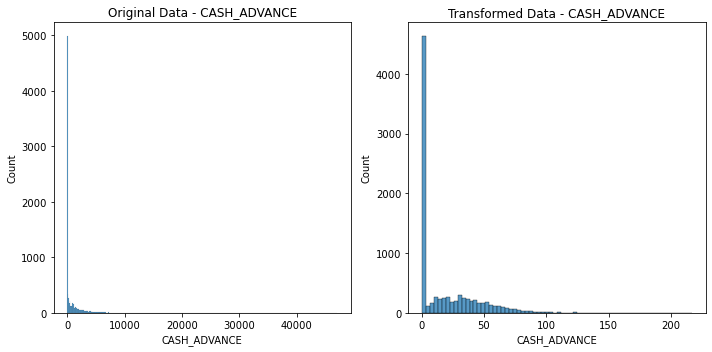

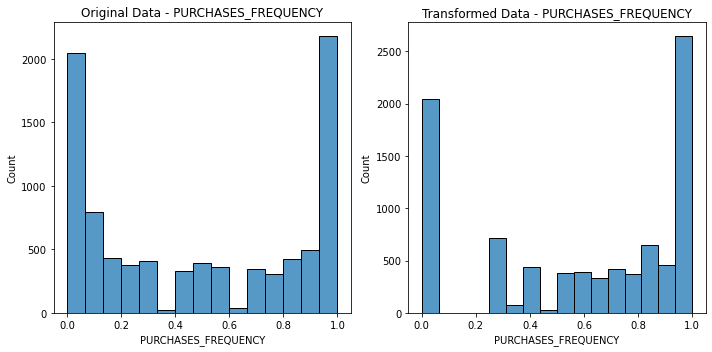

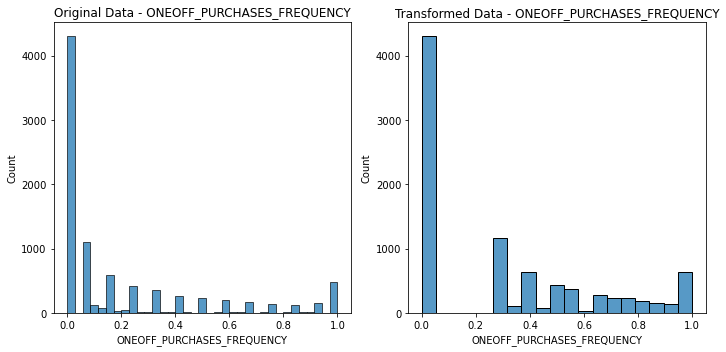

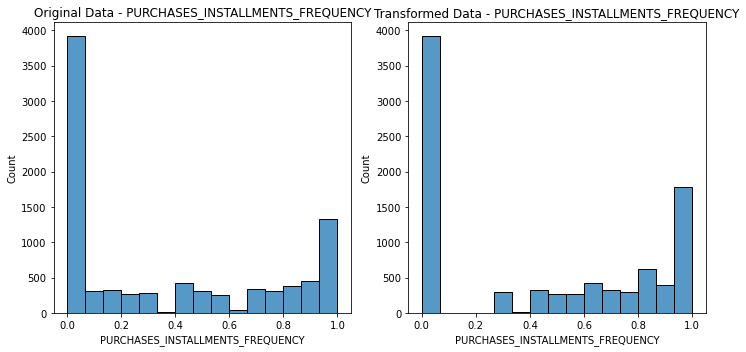

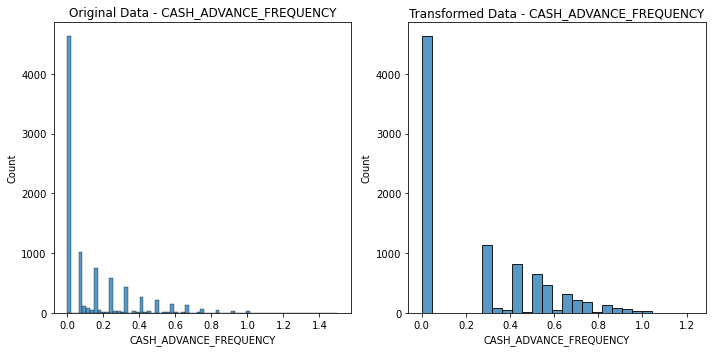

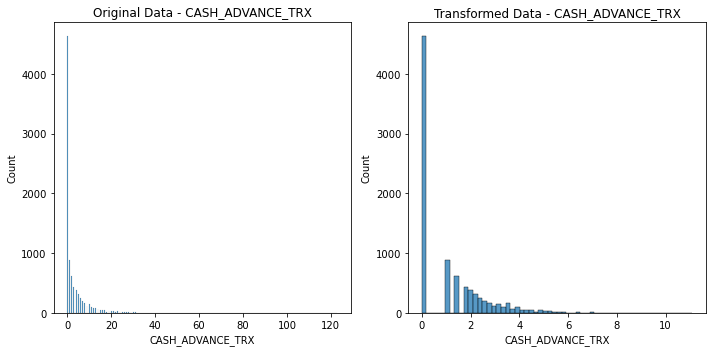

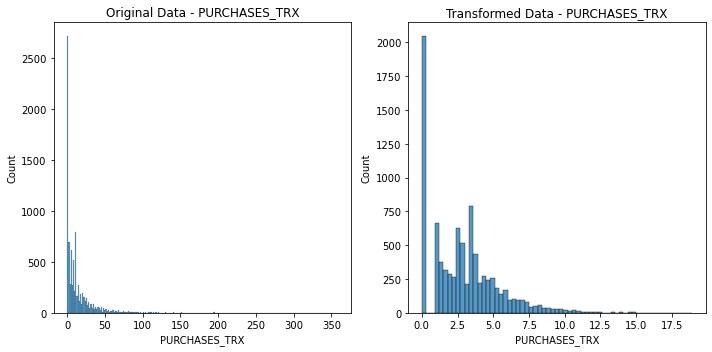

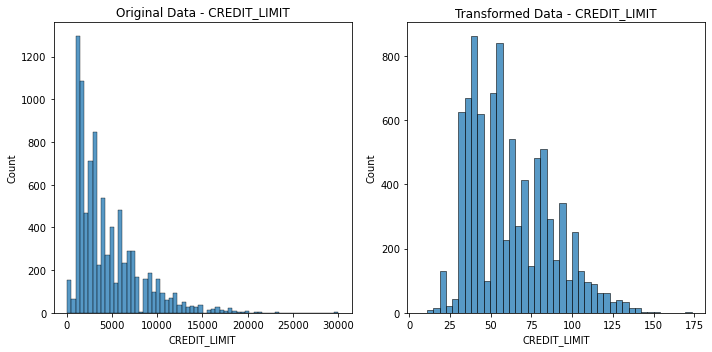

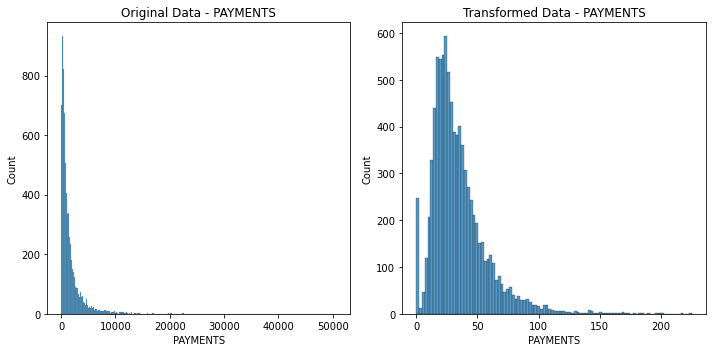

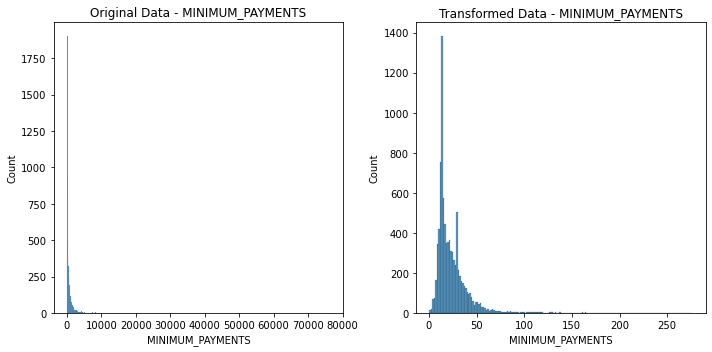

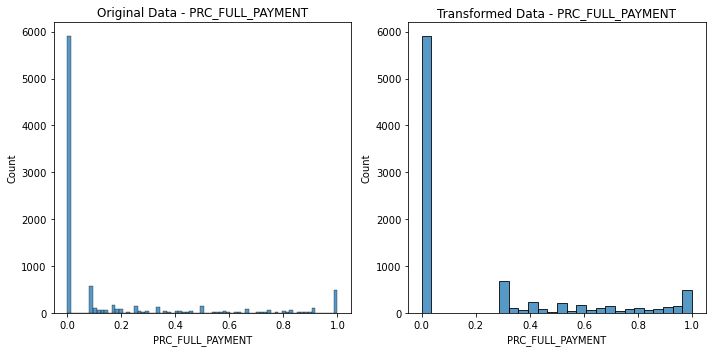

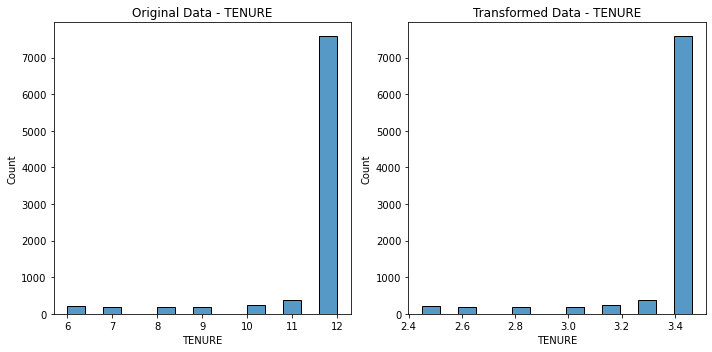

In [10]:
#Plot the data and find skewness again to check how much it was corrected
for column in dataset.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[column])
    plt.title('Original Data - ' + column)
    
    plt.subplot(1, 2, 2)
    sns.histplot(dataset_sqrt[column])
    plt.title('Transformed Data - ' + column)
    
    plt.tight_layout()
    plt.show()

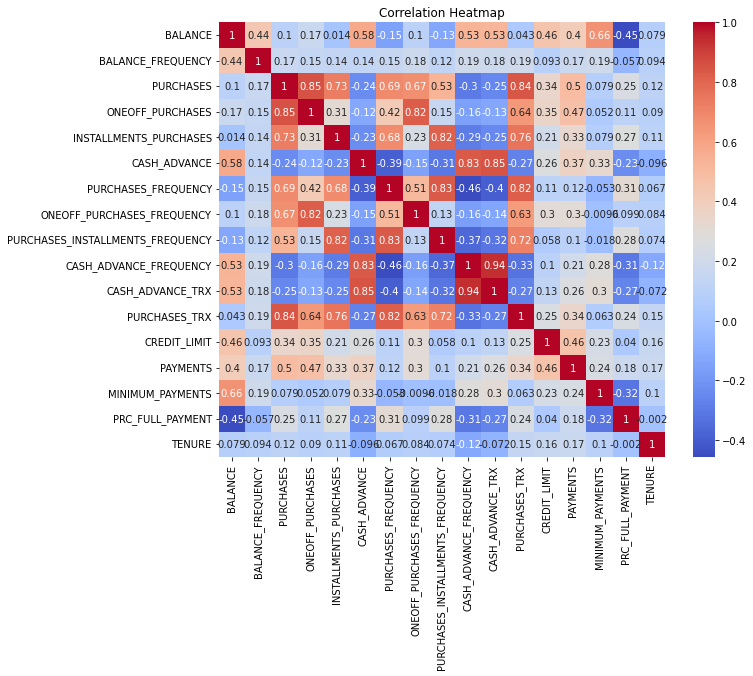

In [11]:
#Plot correlation heatmap to see if there are many correlated features
corr_matrix = dataset_sqrt.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Standardize the data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_sqrt)

In [18]:
#Apply PCA and find out many principal components are needed to explain how much variance then take required  number of principal components so that you reduce the number of columns as well as retain a lot variance of original data as well
pca = PCA()
pca.fit(dataset_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print("Number of components:", num_components)
pca = PCA(n_components=num_components)
dataset_pca = pca.fit_transform(dataset_scaled)

Number of components: 10


In [20]:
#apply clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset_pca)
clusters = kmeans.predict(dataset_pca)
print(clusters)

[2 0 1 ... 2 0 2]


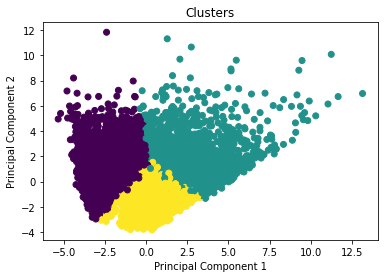

In [21]:
# Visualize clusters
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()